# Make Dynamite Plot

In [5]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/resources/datasets/05c_Howard_MetaAlzheimerReview_DBS-TMS_Coordinates/metadata/master_list.xlsx'
sheet = 'Sheet1'

In [6]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=None, sheet=sheet)
# Call the process_nifti_paths method
data_df = cal_palm.read_and_display_data()
data_df

,Study,DOI,RCT_Design,Age_range,CDR,Active_N,Sham_N,Mean_Age,Active_Age,Sham_Age,...,Memory_Cohen_s_D,Stimulation_site,Stim_Coordinate,Included,Exclusion_Reason,roi_path,roi_path_old,subject,CNM_Damage_Roi_old,CNM_Damage_Roi_new
0,"Qin et al., 2023",10.3389/fncir.2023.1202671,Parallel,NaN,≦2,26.0,25.0,67.0,67.36 ± 6.98,66.25 ± 8.07,...,0.758018,"Left DLPFC, left lateral temporal","[-44,40,29], [-69, -8, -10]",0.0,Multifocal,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,NaN,Qin_et_al___2023,-0.487645,-0.487645
1,"Wu et al., 2024",10.1136/gpsych-2023-101106,Parallel,≧50,0.5-2,20.0,22.0,67.0,66.8 ± 8.84,65.32 ± 7.31,...,-0.100000,Left DLPFC,"[-38, 44, 26]",1.0,iTBS,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,NaN,Wu_et_al___2024,-0.685000,-0.681262
2,"Moussavi et al., 2024",10.1016/j.neurot.2024.e00331,Parallel,>55,1∼2,53.0,51.0,73.0,73.3 ± 6.9,75 ± 9.1,...,NaN,Bilateral DLPFC,"[-41.1, 36, 38], [41.1, 36, 38]",1.0,NaN,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,Moussavi_et_al___2024,-0.369729,-0.370000
3,"Koch et al., 2018",https://doi.org/10.1016/j.neuroimage.2017.12.048,NaN,>65,0.5–1,14.0,NaN,70.0,70 ± 5.1,NaN,...,NaN,Precuneus,"[0, -70, 44]",0.0,Duplicated,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,Koch_et_al___2018,0.540000,0.540000
4,"Cotelli et al., 2011",10.1136/jnnp.2009.197848,Parallel,NaN,NaN,5.0,5.0,71.0,71.2 ± 6.1,74.4 ± 3.8,...,NaN,Left DLPFC,"[-29, 23, 59]",1.0,NaN,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,Cotelli_et_al___2011,-0.510000,0.410000
5,"Ahmed et al., 2012 (1 Hz)",10.1007/s00415-011-6128-4,Parallel,60-82,NaN,15.0,15.0,65.0,65.9 ± 5.9,68.3 ± 4.9,...,NaN,Bilateral DLPFC,"[-22.7, 38.9, 44], [22.7, 38.9, 44]",1.0,NaN,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,NaN,Ahmed_et_al___2012__1_Hz_,NaN,0.430000
6,"Ahmed et al., 2012 (20 Hz)",10.1007/s00415-011-6128-4,Parallel,60-82,NaN,15.0,15.0,65.0,65.9 ± 5.9,68.3 ± 4.9,...,NaN,Bilateral DLPFC,"[-22.7, 38.9, 44], [22.7, 38.9, 44]",0.0,low frequency,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,NaN,Ahmed_et_al___2012__1_Hz_,NaN,0.430000
7,"Li et al., 2021",10.1016/j.brs.2021.01.012,Parallel,NaN,NaN,37.0,38.0,65.0,65.97 ± 8.47,64.58 ± 7.88,...,NaN,Left DLPFC,"[-44,40,29]",1.0,NaN,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,Li_et_al___2021,-0.615157,-0.620000
8,"Wei et al., 2022",10.1016/j.psychres.2022.114721,Parallel,55–85,0.5–2,29.0,27.0,70.0,70 ± 8.68,71.67 ± 7.16,...,0.207207,Left lateral parietal location,"[-47, -68, 36]",1.0,NaN,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,Wei_et_al___2022,0.620000,0.610000
9,"Koch et al., 2022",10.1093/brain/awac285,Parallel,50–85,0.5–1,25.0,25.0,75.0,75 ± 5.6,72.3 ± 7.2,...,NaN,Precuneus,"[0, -70, 44]",1.0,NaN,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,Koch_et_al___2022,0.545000,0.545000



# 01 - Preprocess Your Data

**Handle NANs**
- Set drop_nans=True is you would like to remove NaNs from data
- Provide a column name or a list of column names to remove NaNs from

In [7]:
data_df.columns

Index(['Study', 'DOI', 'RCT_Design', 'Age_range', 'CDR', 'Active_N', 'Sham_N',
       'Mean_Age', 'Active_Age', 'Sham_Age', 'Active_M_F', 'Sham_M_F',
       'Active_Education__Yrs_', 'Sham_Education__Yrs_',
       'Active_AD_Treatment_Proportion', 'Diagnosis', 'Diagnostic_Criteria',
       'Stim_Type', 'Frequency', 'Intensity', 'Navigation',
       'Total_Pulses_session', 'session', 'Total_pulses',
       'Overall_Cognition_Test', 'Overall_Cognition_Cohen_s_D', 'Redo_test',
       'cohens_D_redo', 'Verbal_Memory_Test', 'Memory_Cohen_s_D',
       'Stimulation_site', 'Stim_Coordinate', 'Included', 'Exclusion_Reason',
       'roi_path', 'roi_path_old', 'subject', 'CNM_Damage_Roi_old',
       'CNM_Damage_Roi_new'],
      dtype='object')

In [9]:
drop_list = ['CNM_Damage_Roi_old', 'cohens_D_redo']

In [10]:
data_df = cal_palm.drop_nans_from_columns(columns_to_drop_from=drop_list)
data_df

,Study,DOI,RCT_Design,Age_range,CDR,Active_N,Sham_N,Mean_Age,Active_Age,Sham_Age,...,Memory_Cohen_s_D,Stimulation_site,Stim_Coordinate,Included,Exclusion_Reason,roi_path,roi_path_old,subject,CNM_Damage_Roi_old,CNM_Damage_Roi_new
0,"Qin et al., 2023",10.3389/fncir.2023.1202671,Parallel,NaN,≦2,26.0,25.0,67.0,67.36 ± 6.98,66.25 ± 8.07,...,0.758018,"Left DLPFC, left lateral temporal","[-44,40,29], [-69, -8, -10]",0.0,Multifocal,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,NaN,Qin_et_al___2023,-0.487645,-0.487645
1,"Wu et al., 2024",10.1136/gpsych-2023-101106,Parallel,≧50,0.5-2,20.0,22.0,67.0,66.8 ± 8.84,65.32 ± 7.31,...,-0.100000,Left DLPFC,"[-38, 44, 26]",1.0,iTBS,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,NaN,Wu_et_al___2024,-0.685000,-0.681262
2,"Moussavi et al., 2024",10.1016/j.neurot.2024.e00331,Parallel,>55,1∼2,53.0,51.0,73.0,73.3 ± 6.9,75 ± 9.1,...,NaN,Bilateral DLPFC,"[-41.1, 36, 38], [41.1, 36, 38]",1.0,NaN,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,Moussavi_et_al___2024,-0.369729,-0.370000
3,"Koch et al., 2018",https://doi.org/10.1016/j.neuroimage.2017.12.048,NaN,>65,0.5–1,14.0,NaN,70.0,70 ± 5.1,NaN,...,NaN,Precuneus,"[0, -70, 44]",0.0,Duplicated,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,Koch_et_al___2018,0.540000,0.540000
4,"Cotelli et al., 2011",10.1136/jnnp.2009.197848,Parallel,NaN,NaN,5.0,5.0,71.0,71.2 ± 6.1,74.4 ± 3.8,...,NaN,Left DLPFC,"[-29, 23, 59]",1.0,NaN,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,Cotelli_et_al___2011,-0.510000,0.410000
7,"Li et al., 2021",10.1016/j.brs.2021.01.012,Parallel,NaN,NaN,37.0,38.0,65.0,65.97 ± 8.47,64.58 ± 7.88,...,NaN,Left DLPFC,"[-44,40,29]",1.0,NaN,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,Li_et_al___2021,-0.615157,-0.620000
8,"Wei et al., 2022",10.1016/j.psychres.2022.114721,Parallel,55–85,0.5–2,29.0,27.0,70.0,70 ± 8.68,71.67 ± 7.16,...,0.207207,Left lateral parietal location,"[-47, -68, 36]",1.0,NaN,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,Wei_et_al___2022,0.620000,0.610000
9,"Koch et al., 2022",10.1093/brain/awac285,Parallel,50–85,0.5–1,25.0,25.0,75.0,75 ± 5.6,72.3 ± 7.2,...,NaN,Precuneus,"[0, -70, 44]",1.0,NaN,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,Koch_et_al___2022,0.545000,0.545000
10,"Jia et al., 2021",10.3389/fnagi.2021.693611,Parallel,55–85,0.5–2,35.0,34.0,71.0,71.41 ± 8.85,73.41 ± 7.73,...,0.319231,Left lateral parietal site,"[-47, -68, 36]",1.0,NaN,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,Jia_et_al___2021,0.605000,0.610000
11,"Saitoh et al., 2022 (90%RTM)",10.3389/fnagi.2022.993306,Parallel,NaN,NaN,13.0,NaN,77.0,77.2,NaN,...,NaN,Bilateral DLPFC,"[-29, 23, 59], [29, 23, 59]",1.0,NaN,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,Saitoh_et_al___2022__90_RTM_,0.353568,0.353000


**Drop Row Based on Value of Column**

Define the column, condition, and value for dropping rows
- column = 'your_column_name'
- condition = 'above'  # Options: 'equal', 'above', 'below'

Set the parameters for dropping rows

In [11]:
data_df.columns

Index(['Study', 'DOI', 'RCT_Design', 'Age_range', 'CDR', 'Active_N', 'Sham_N',
       'Mean_Age', 'Active_Age', 'Sham_Age', 'Active_M_F', 'Sham_M_F',
       'Active_Education__Yrs_', 'Sham_Education__Yrs_',
       'Active_AD_Treatment_Proportion', 'Diagnosis', 'Diagnostic_Criteria',
       'Stim_Type', 'Frequency', 'Intensity', 'Navigation',
       'Total_Pulses_session', 'session', 'Total_pulses',
       'Overall_Cognition_Test', 'Overall_Cognition_Cohen_s_D', 'Redo_test',
       'cohens_D_redo', 'Verbal_Memory_Test', 'Memory_Cohen_s_D',
       'Stimulation_site', 'Stim_Coordinate', 'Included', 'Exclusion_Reason',
       'roi_path', 'roi_path_old', 'subject', 'CNM_Damage_Roi_old',
       'CNM_Damage_Roi_new'],
      dtype='object')

In [13]:
column = 'Included'  # The column you'd like to evaluate
condition = 'not'  # Thecondition to check ('equal', 'above', 'below', 'not')
value = 1 # The value to compare against

In [14]:
data_df, other_df = cal_palm.drop_rows_based_on_value(column, condition, value)
data_df

,Study,DOI,RCT_Design,Age_range,CDR,Active_N,Sham_N,Mean_Age,Active_Age,Sham_Age,...,Memory_Cohen_s_D,Stimulation_site,Stim_Coordinate,Included,Exclusion_Reason,roi_path,roi_path_old,subject,CNM_Damage_Roi_old,CNM_Damage_Roi_new
1,"Wu et al., 2024",10.1136/gpsych-2023-101106,Parallel,≧50,0.5-2,20.0,22.0,67.0,66.8 ± 8.84,65.32 ± 7.31,...,-0.100000,Left DLPFC,"[-38, 44, 26]",1.0,iTBS,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,NaN,Wu_et_al___2024,-0.685000,-0.681262
2,"Moussavi et al., 2024",10.1016/j.neurot.2024.e00331,Parallel,>55,1∼2,53.0,51.0,73.0,73.3 ± 6.9,75 ± 9.1,...,NaN,Bilateral DLPFC,"[-41.1, 36, 38], [41.1, 36, 38]",1.0,NaN,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,Moussavi_et_al___2024,-0.369729,-0.370000
4,"Cotelli et al., 2011",10.1136/jnnp.2009.197848,Parallel,NaN,NaN,5.0,5.0,71.0,71.2 ± 6.1,74.4 ± 3.8,...,NaN,Left DLPFC,"[-29, 23, 59]",1.0,NaN,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,Cotelli_et_al___2011,-0.510000,0.410000
7,"Li et al., 2021",10.1016/j.brs.2021.01.012,Parallel,NaN,NaN,37.0,38.0,65.0,65.97 ± 8.47,64.58 ± 7.88,...,NaN,Left DLPFC,"[-44,40,29]",1.0,NaN,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,Li_et_al___2021,-0.615157,-0.620000
8,"Wei et al., 2022",10.1016/j.psychres.2022.114721,Parallel,55–85,0.5–2,29.0,27.0,70.0,70 ± 8.68,71.67 ± 7.16,...,0.207207,Left lateral parietal location,"[-47, -68, 36]",1.0,NaN,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,Wei_et_al___2022,0.620000,0.610000
9,"Koch et al., 2022",10.1093/brain/awac285,Parallel,50–85,0.5–1,25.0,25.0,75.0,75 ± 5.6,72.3 ± 7.2,...,NaN,Precuneus,"[0, -70, 44]",1.0,NaN,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,Koch_et_al___2022,0.545000,0.545000
10,"Jia et al., 2021",10.3389/fnagi.2021.693611,Parallel,55–85,0.5–2,35.0,34.0,71.0,71.41 ± 8.85,73.41 ± 7.73,...,0.319231,Left lateral parietal site,"[-47, -68, 36]",1.0,NaN,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,Jia_et_al___2021,0.605000,0.610000
11,"Saitoh et al., 2022 (90%RTM)",10.3389/fnagi.2022.993306,Parallel,NaN,NaN,13.0,NaN,77.0,77.2,NaN,...,NaN,Bilateral DLPFC,"[-29, 23, 59], [29, 23, 59]",1.0,NaN,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,Saitoh_et_al___2022__90_RTM_,0.353568,0.353000
12,"Kuhn et al., 2015",https://doi.org/10.1038/mp.2014.32,Crossover,57-90,<0.5,6.0,NaN,69.0,69.5 ± 7.7,NaN,...,NaN,Bilateral NBM,"[-20, -7.1, -8.6], [20, -7.1, -8.6]",1.0,no sham arm,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,Kuhn_et_al___2015,0.045051,0.451000
13,"Saitoh et al., 2022 (120%RTM)",10.3389/fnagi.2022.993306,Parallel,60–93 (participant data),1–2,15.0,12.0,76.0,76.2,75.8,...,NaN,Bilateral DLPFC,"[-29, 23, 59], [29, 23, 59]",1.0,NaN,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,Saitoh_et_al___2022__120_RTM_,0.333408,0.346747


Regress out Covariates

In [ ]:
data_df.columns

In [ ]:
dependent_variable_list = ['Pre_Post_Memory_Effect_Size__Cohen_s_D_']
regressors = ['Disease', 'Years_Between_Measurements', 'Mean_Age', 'Closed_Loop']

In [ ]:
#Impute covariates in if desired
for col in regressors:
    if data_df[col].dtype == 'O':  # object/categorical
        data_df[col] = data_df[col].fillna(data_df[col].mode()[0])
    else:  # numeric
        data_df[col] = data_df[col].fillna(data_df[col].mean())
data_df[regressors].isna().sum()

In [ ]:
from calvin_utils.statistical_utils.regression_utils import RegressOutCovariates
data_df, adjusted_dep_vars_list = RegressOutCovariates.run(df=data_df, dependent_variable_list=dependent_variable_list, covariates_list=regressors)
print(adjusted_dep_vars_list)

**Standardize Data**
- Enter Columns you Don't want to standardize into a list

In [ ]:
data_df.columns

In [ ]:
# Remove anything you don't want to standardize
cols_not_to_standardize = ['TOTAL11']

In [ ]:
# data_df = cal_palm.standardize_columns(cols_not_to_standardize)

Do Miscellaneous Data Cleaning

In [ ]:
# data_df = data_df[(data_df['Pre_Post_Memory_Effect_Size__Cohen_s_D_'] >= -1) & (data_df['Pre_Post_Memory_Effect_Size__Cohen_s_D_'] <= 1)]

In [16]:
data_df.columns

Index(['Study', 'DOI', 'RCT_Design', 'Age_range', 'CDR', 'Active_N', 'Sham_N',
       'Mean_Age', 'Active_Age', 'Sham_Age', 'Active_M_F', 'Sham_M_F',
       'Active_Education__Yrs_', 'Sham_Education__Yrs_',
       'Active_AD_Treatment_Proportion', 'Diagnosis', 'Diagnostic_Criteria',
       'Stim_Type', 'Frequency', 'Intensity', 'Navigation',
       'Total_Pulses_session', 'session', 'Total_pulses',
       'Overall_Cognition_Test', 'Overall_Cognition_Cohen_s_D', 'Redo_test',
       'cohens_D_redo', 'Verbal_Memory_Test', 'Memory_Cohen_s_D',
       'Stimulation_site', 'Stim_Coordinate', 'Included', 'Exclusion_Reason',
       'roi_path', 'roi_path_old', 'subject', 'CNM_Damage_Roi_old',
       'CNM_Damage_Roi_new'],
      dtype='object')

In [27]:
import numpy as np
data_df['sign'] = np.where(data_df['cohens_D_redo'] > 0, 1, 0)
data_df['sign']

/var/folders/82/946tskyj68b6htgvndtppmz80000gp/T/ipykernel_90962/1258465536.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['sign'] = np.where(data_df['cohens_D_redo'] > 0, 1, 0)


1     1
2     0
4     0
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
20    1
22    1
23    1
24    1
25    1
Name: sign, dtype: int64

# Generate the Plot

In [28]:
data_df.columns

Index(['Study', 'DOI', 'RCT_Design', 'Age_range', 'CDR', 'Active_N', 'Sham_N',
       'Mean_Age', 'Active_Age', 'Sham_Age', 'Active_M_F', 'Sham_M_F',
       'Active_Education__Yrs_', 'Sham_Education__Yrs_',
       'Active_AD_Treatment_Proportion', 'Diagnosis', 'Diagnostic_Criteria',
       'Stim_Type', 'Frequency', 'Intensity', 'Navigation',
       'Total_Pulses_session', 'session', 'Total_pulses',
       'Overall_Cognition_Test', 'Overall_Cognition_Cohen_s_D', 'Redo_test',
       'cohens_D_redo', 'Verbal_Memory_Test', 'Memory_Cohen_s_D',
       'Stimulation_site', 'Stim_Coordinate', 'Included', 'Exclusion_Reason',
       'roi_path', 'roi_path_old', 'subject', 'CNM_Damage_Roi_old',
       'CNM_Damage_Roi_new', 'sign'],
      dtype='object')

In [29]:
x_col = 'sign'
y_col = 'CNM_Damage_Roi_old'

In [30]:
out_dir = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/tms_meta_analysis/redo_for_simon'

/Users/cu135/Software_Local/calvin_utils_project/calvin_utils_project/calvin_utils/statistical_utils/dynamite_plot.py:72: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=means.index, y=means.values, palette=self.bar_palette, ci=None)


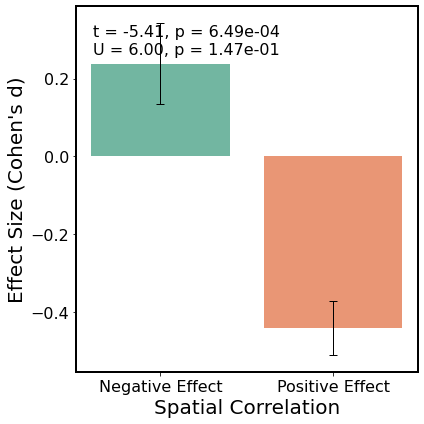

In [31]:
from calvin_utils.statistical_utils.dynamite_plot import DynamitePlotter
plotter = DynamitePlotter()
plotter.plot(
    df=data_df,
    xlabel="Spatial Correlation",
    ylabel="Effect Size (Cohen's d)",
    group_col=x_col,
    y_col=y_col,
    dataset_name='',
    out_dir=out_dir
)